In [7]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
import os
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import *
stemmer = PorterStemmer()


In [5]:
from collections import Counter
from string import punctuation
import json
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [8]:
#%conda install -c conda-forge wordcloud

In [17]:
from wordcloud import WordCloud
import re

In [10]:
data = pd.read_csv('twitter_data_v1.csv')

In [11]:
data.head()

,Unnamed: 0,author_id,id,retweet_count,reply_count,like_count,quote_count,text,source,referenced_tweets,created_at,lang,place_id
0,0,39189472,1477065673939378177,0,0,0,0,even as I sit here in this silver lake coffee ...,Twitter for iPhone,NaN,2021-12-31 23:54:33+00:00,en,3b77caf94bfc81fe
1,1,88981023,1477065152994459652,0,0,1,0,@mona_s @Lt_Fedora Still lobbying for Barbie i...,Twitter for iPhone,[<ReferencedTweet id=1477048448964775937 type=...,2021-12-31 23:52:29+00:00,en,01fbdc902515ef96
2,2,759021667498627072,1477065021259661312,0,0,0,0,@VickiLynnLawson @xjelliott I look at our GOP ...,Twitter for iPhone,[<ReferencedTweet id=1476975641471893507 type=...,2021-12-31 23:51:58+00:00,en,e8ad2641c1cb666c
3,3,1374419199355883530,1477064581063352324,0,0,1,0,I thank God I have a very masculine man. I lov...,Twitter for iPhone,NaN,2021-12-31 23:50:13+00:00,en,4548df3d99bb4891
4,4,14399730,1477064397436690432,0,0,1,0,@StandardbredGal Wait a minute! Testosterone i...,Twitter for Android,[<ReferencedTweet id=1476967453628456969 type=...,2021-12-31 23:49:29+00:00,en,016727834eac6588


In [56]:
def clean_data(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    tweet = re.sub("[^a-z0-9]"," ", tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    return tweet
# ______________________________________________________________

# clean dataframe's text column


In [72]:
print(data['text'][37])
clean_data(data['text'][37])

@suealtman @CCDems @connerstrong @CCPCamden The attacks are misogyny personified. “She lost her bid for Mayor” so she cannot have a voice in Council, which is the office they got elected to and serve? Once again, women have the courage to demand accountability &amp; all these man can do is go low. #WomenLead #RunWomenRun


'the attacks are misogyny personified she lost her bid for mayor she cannot have voice council which the office they got elected and serve once again women have the courage demand accountability all these man can low '

In [58]:
data['cleaned text'] = data['text'].apply(clean_data)
# preview some cleaned tweets
data['cleaned text'].head()

0    even sit here this silver lake coffee shop lis...
1    still lobbying for barbie the nutcracker over ...
2    look our gop legislators asked myself the same...
3              thank god have very masculine man love 
4    wait minute testosterone stallion should not e...
Name: cleaned text, dtype: object

In [59]:
all_words = []
for line in list(data['cleaned text']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(10)

[('the', 158560),
 ('and', 114643),
 ('you', 62281),
 ('that', 58530),
 ('for', 46729),
 ('women', 38028),
 ('this', 35630),
 ('are', 34179),
 ('not', 31351),
 ('with', 28633)]

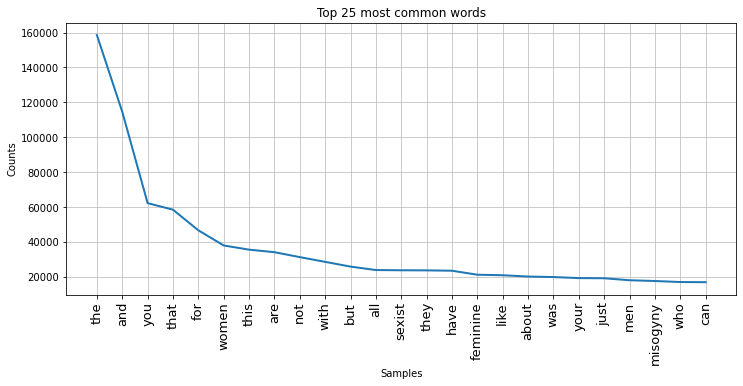

Text(0.5, 1.0, 'log-log plot of words frequency')

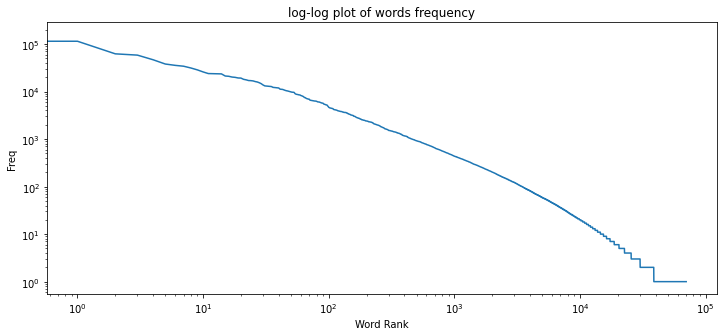

In [60]:
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

In [62]:
from nltk.corpus import stopwords
nltk.download('stopwords')
# show stop words examples
stop_words = stopwords.words('english') # Show some stop words
' , '.join(stop_words)[:200], len(stop_words)
print(type(stop_words))
print(stop_words)

<class 'list'>
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
import string
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords except for those in first person
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]

# -------------------------------------------

# tokenize message column and create a column for tokens
data['tokens'] = data['cleaned text'].apply(text_process) # tokenize style 1
data['tokens'].head()

0    [even, sit, silver, lake, coffee, shop, listen...
1    [still, lobbying, barbie, nutcracker, next, de...
2    [look, gop, legislators, asked, question, ille...
3                   [thank, god, masculine, man, love]
4    [wait, minute, testosterone, stallion, elicit,...
Name: tokens, dtype: object

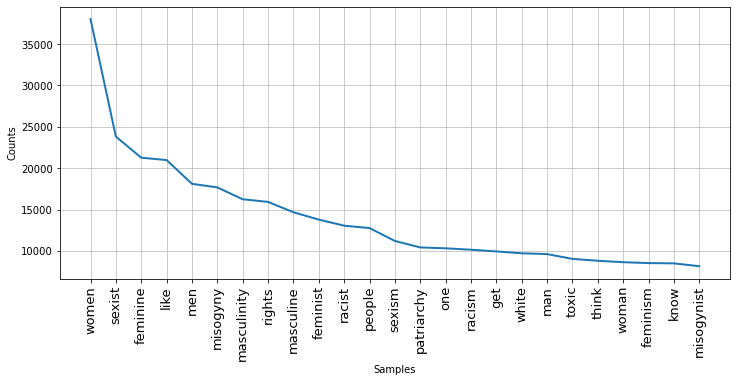

Text(0.5, 0, 'Word Rank')

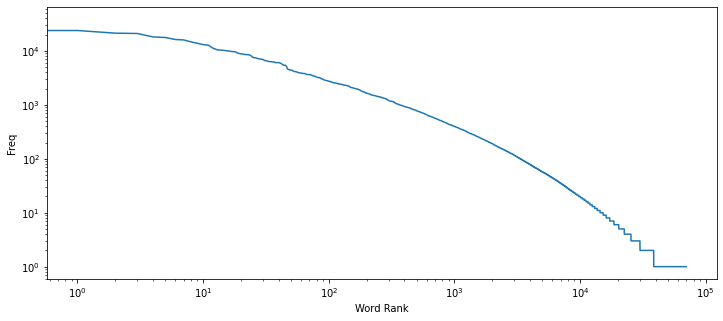

In [65]:
all_words = []
for ls in data['tokens']:
    words = [w for w in ls]
    for word in words:
        all_words.append(word.lower())
    
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

# log-log  of all words 
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

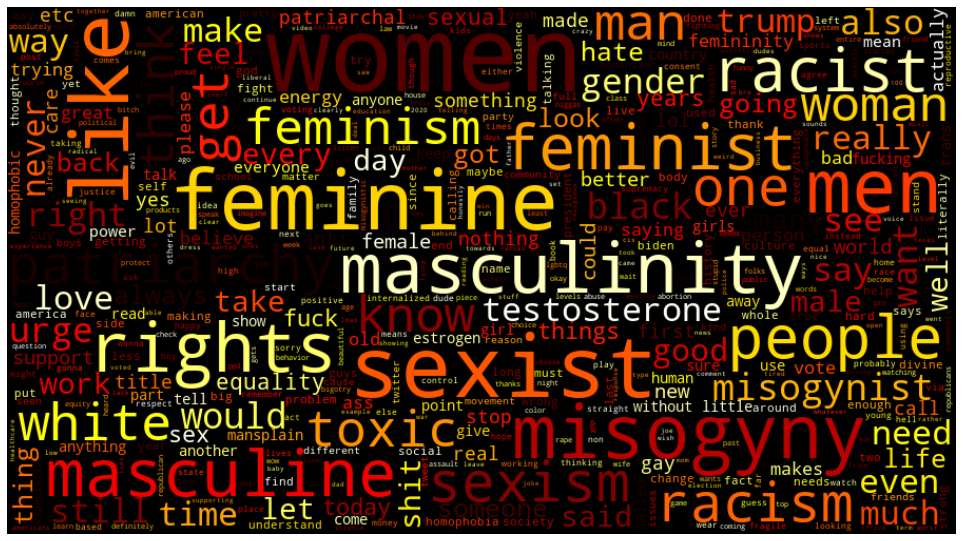

In [67]:
all_words = []
for line in data['tokens']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='hot',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [77]:

print(' '.join(data['tokens'][37]))
print(data['tokens'][37])

attacks misogyny personified lost bid mayor cannot voice council office got elected serve women courage demand accountability man low
['attacks', 'misogyny', 'personified', 'lost', 'bid', 'mayor', 'cannot', 'voice', 'council', 'office', 'got', 'elected', 'serve', 'women', 'courage', 'demand', 'accountability', 'man', 'low']


In [83]:
Counter(all_words).most_common(10)

[('women', 38028),
 ('sexist', 23821),
 ('feminine', 21271),
 ('like', 20981),
 ('men', 18109),
 ('misogyny', 17675),
 ('masculinity', 16243),
 ('rights', 15925),
 ('masculine', 14672),
 ('feminist', 13782)]

In [84]:
data.to_csv('twitter_data_v1_cleaned.csv')